## Класифікатори


| Алгоритм | Плюси | Мінуси | 
| --- | --- | --- | 
| Лінійна регресія | Простота реалізаціЇ | Немає гарантії працездатності. Підтримка лише бінарних міток |
| Логістична регресія | Висока точність. Універсальний метод регулювання моделі для самостійного налаштування. Відгуки моделі є мірою ймовірності. Модель можна легко оновити, використовуючи нові дані | Підтримка лише бінарних міток | 
| Багатозмінна логістична регресія | Підтримує багатокласову класифікацію. Відгуки моделі є мірою ймовірності | Складніше у реалізації | 



### Підготовка данних

![image](image.png)


---

Використовуючи математичні позначення, класифікатор є функцією `у = f(x)` , в якій аргумент `х` означає вхідні дані, а `у` вихідні дані, зокрема категорію.
Використовуючи термінологію наукової літератури, можна вважати:
><b>`вхідний вектор` `x` - `незалежною змінною`</b> 

><b>`вихідні дані` `у` - `залежна змінна`</b>.

---

![image](image2.png)

---
Є два типи дискретних наборів: значення, які можна впорядкувати (ординальні), і значення, які впорядкувати не можна (номінальні)

Простий метод представлення номінальних елементів у базі даних полягає у привласненні кожної мітки номера. Наш набір `{банан, яблуко, апельсин}` може натомість розглядатися як `{0, 1, 2}`. Але деякі моделі класифікації можуть бути дуже упередженими. Це з поведінкою бази даних. Наприклад, <b>лінійна регресія</b> може інтерпретувати яблуко як щось середнє між бананом і апельсином, що не має якогось певного сенсу.


Обхідний шлях представлення номінальних категорій залежної змінної полягає у додаванні <b>`фіктивних змінних (dummy variables)`</b> для кожної номінальної змінної. У цьому прикладі змінна фрукт буде видалена та замінена трьома різними змінними:`банан`, `яблуко` та `апельсин`. Кожна змінна приймає значення 0 або 1 в залежності від категорії, для якої це є істиною. 

Цей процес часто називають <b>`прямим кодуванням`</b>.


#### Приклад прямого кодування

In [787]:
import pandas as pd
import tensorflow as tf
import numpy as np
from keras import utils

In [788]:
def get_nominal_integer_dict(nominal_vals):
    d = {}
    for val in nominal_vals:
        if val not in d:
            current_max = max(d.values()) if len(d) > 0 else -1
            d[val] = current_max+1
    return d


def convert_to_integer(srs):
    d = get_nominal_integer_dict(srs)
    return srs.map(lambda x: d[x])

def convert_strings_to_integer(df):
    ret = pd.DataFrame()
    for column_name in df:
        column = df[column_name]
        if column.dtype=='string' or column.dtype=='object':
            ret[column_name] = convert_to_integer(column)
        else:
            ret[column_name] = column
    return ret

In [789]:
df = pd.read_csv('../../lab02/iris.csv')

In [790]:
labels1 = df['Species'].drop_duplicates().head()
print(labels1)

0          Iris-setosa
50     Iris-versicolor
100     Iris-virginica
Name: Species, dtype: object


In [791]:
labels1Tensor = tf.convert_to_tensor(labels1)
print(labels1Tensor)


tf.Tensor([b'Iris-setosa' b'Iris-versicolor' b'Iris-virginica'], shape=(3,), dtype=string)


In [792]:
# labels1TensorCategorical = utils.to_categorical(labels1Tensor, *labels1Tensor.shape)
# print(labels1TensorCategorical)

In [793]:
df_handled = convert_strings_to_integer(df)

In [794]:
labels2 =  df_handled['Species']
print(labels2)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [795]:
labels2Tensor = tf.convert_to_tensor(labels2.drop_duplicates())
print(labels2Tensor)


tf.Tensor([0 1 2], shape=(3,), dtype=int64)


In [796]:
labels2TensorCategorical = utils.to_categorical(labels2Tensor, *labels2Tensor.shape)
print(labels2TensorCategorical)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [797]:
y_train = utils.to_categorical(labels2,*labels2Tensor.shape)
print(y_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

### Оцінка ефективності

Перед тим як розпочинати складання алгоритму класифікації, необхідно перевірити успішність його результатів. У цьому розділі описуються основні методи оцінки ефективності розв'язання задач класифікації.

#### Правильність (Accuracy)

Правильність оцінюється за такою формулою:

`Аccuracy` = `Правильні висновки` / `Всі висновки`

Ця формула дає грубу оцінку ефективності, яка може бути достатньою, якщо вас не турбує підсумкова правильність алгоритму. Але оцінка правильності не передбачає поділу результатів кожного класу на правильні і неправильні.

Для обліку цього обмеження застосовується <b>`матриця невідповідностей` `(confusion matrix)`</b>, яка дає більш детальну оцінку ефективності методу класифікації. Корисно також одержати ефективність класифікатора, перевіривши його для кожного класу.

#### Матриця невідповідностей (Confusion Matrix)

<table>

<tbody><tr>
<td>
<table>
<tbody><tr>
<th colspan="2" rowspan="2">
</th>
<th colspan="2">Справжній клас
</th></tr>
<tr>
<th>Істинний
</th>
<th>Хибний
</th></tr>
<tr>
<th rowspan="2"><div>Прогнозований<br>клас</div>
</th>
<th>Позитивний
</th>
<td><b>ІП</b>
</td>
<td>ХП
</td></tr>
<tr>
<th>Негативний
</th>
<td>ХН
</td>
<td><b>ІН</b>
</td></tr>
</tbody></table>
</td>
<td>
</td></tr></tbody></table>

| Назва | Значення | English | Пояснення |
| --- | --- | --- | --- |
| <b>`ІП`</b> | Істинно Позитивний | True Positive | Якщо елементи данних були правильно спрогнозованні, як позитивні то такі прогнози називаються <b>`Істинно позитивними`</b> (<b>`ІП`</b>) |
| <b>`ХП`</b> | Хибно Позитивний |  False Positive | Якщо елементи були спрогнозовані неправильно як позитивні, такі висновки називають <b>`Хибно позитивними`</b> (<b>`ХП`<b>). |
| <b>`ІН`</b> | Істинно Негативний | True Negative | Коли прогноз і дійсність збігаються в тому, що елементу даних присвоє мітка негативного елемента, цей висновок називають <b>`Істинно Негативний`</b> (<b>`ІН`<b>)  |
| <b>`ХН`</b> | Хибно Негативний | False Negative | Якщо алгоритм випадково прогнозує елемент як негативний, коли він насправді позитивний, то цей висновок називають <b>`Хибно Негативний`</b> (<b>`ХН`<b>) | 

#### Точність (Precision)

Відношення істинно позитивних висновків до сумарно позитивних зветься <b>`точності`</b> ( <b>`precision`</b>). Воно є мірою ймовірності того, що позитивний прогноз виявиться правильним.

<b>`Precision`<b> = <b>`Істинно позитивні`</b> / <b>`Істинно позитивні`</b> + <b>`Хибно позитивні`</b>

#### Повнота (Recall)

<b>`Recall`</b> = <b>`Істинно позитивні`</b> / <b>`Істинно позитивні`</b> + <b>`Хибно Негативні`</b>

#### Приклад

Давайте швидко розглянемо приклад. Припустимо, ви намагаєтеся ідентифікувати кішок у наборі зі 100 зображень; 40 фотографій – кішки, а 60 – собаки. Коли ви запускаєте класифікатор, 10 із кішок ідентифікуються як собаки, а 20 із собак ідентифікуються як кішки.

<table>

<tbody><tr>
<td>
<table>
<tbody><tr>
<th colspan="2" rowspan="2">
</th>
<th colspan="2">Справжній клас
</th></tr>
<tr>
<th>Кішка
</th>
<th>Собака
</th></tr>
<tr>
<th rowspan="2"><div>Прогнозований<br>клас</div>
</th>
<th>Кішка
</th>
<td><b>30 ІП</b>
</td>
<td>20 ХП
</td></tr>
<tr>
<th>Собака
</th>
<td>10 ХН
</td>
<td><b>40 ІН</b>
</td></tr>
</tbody></table>
</td>
<td>
</td></tr></tbody></table>

>Яка точність та повнота для кішок? 



1. Точність 
   1.  30 / 30 + 20 aбо 3/5 
2. Повнота 
   1. 30 / 30 + 10 або 3/4

>Яка правильність системи?

1. Правильність 
   1. 30 + 40 / 100  або 70%

### Підготовка данних для порівняння алгоритмів

In [798]:
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

from keras import utils
from keras import layers
from keras import optimizers
from keras import losses
from keras import models

In [799]:
x_label0 = np.random.normal(3,1,100)
x_label1 = np.random.normal(7,1,100)

x_train = np.append(x_label0, x_label1)

y_label0 = [0.] * len(x_label0)
y_label1 = [1.] * len(x_label1)

y_train = y_label0 + y_label1

In [800]:
x = tf.convert_to_tensor(x_train)
print(x)

tf.Tensor(
[3.28762903 0.8899305  2.58208466 1.23110411 4.20711261 2.80843824
 1.67376152 4.70725023 3.00351575 2.98299873 4.26810031 2.196999
 3.55626044 2.82156338 3.7758616  3.18945319 2.4689562  3.2622399
 2.45197068 2.495271   3.48200528 1.7763122  4.1138724  2.63841294
 5.04972657 3.61343395 3.64813703 1.80710466 3.63017992 4.3564551
 0.55012092 3.62283761 4.05917061 1.97551427 1.55520004 3.07679911
 3.57152885 4.37743062 2.86263202 4.73271709 4.76876502 4.31499378
 4.23945627 3.22877972 2.2266394  1.40072084 2.08922567 1.9093358
 3.81637599 4.55887046 3.57844989 2.8380135  1.11555493 0.91705693
 4.53135358 2.30860311 3.11366284 2.2494995  1.23368936 3.9965072
 3.0688002  2.5311432  2.51822559 3.58362835 3.24777737 5.34523509
 4.66406369 3.2261358  3.01897172 1.75662672 3.58168538 4.10732385
 3.69182852 3.66749405 3.6415469  4.45593088 2.22175617 3.58718468
 2.51726528 1.53488494 1.92313455 2.11444565 3.18280842 3.5874896
 2.40748337 2.17011197 3.46707151 3.70292565 3.76990214 3.

In [801]:
y = tf.convert_to_tensor(utils.to_categorical(y_train,2))
print(y)

tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]

In [802]:
# plt.scatter(x,y)

### Лінійна регресія

In [803]:
regression= models.Sequential()
regression.add(layers.Dense(64, activation='relu', input_shape=(1,)))
regression.add(layers.Dense(64, activation='relu'))
regression.add(layers.Dense(1))
regression.compile(optimizer='adam', loss='mse', metrics=['mae','accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [804]:
regression.fit(x, y, epochs = 1000)

Epoch 1/1000


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5000 - loss: 0.6227 - mae: 0.6340  
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.5000 - loss: 0.3455 - mae: 0.5066
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.5000 - loss: 0.2932 - mae: 0.5000
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.5000 - loss: 0.2954 - mae: 0.5000
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.5000 - loss: 0.2798 - mae: 0.5000
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.5000 - loss: 0.2822 - mae: 0.5000
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.5000 - loss: 0.2752 - mae: 0.5000
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.5000 - loss: 0.2726 - mae: 0.5000
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5000 - loss: 0.2728 - mae: 0.5000 
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.5000 - loss: 0.2683 - mae: 0.5000
Epoch 11/1000

In [805]:
y_regression = regression.predict_on_batch(x_train)

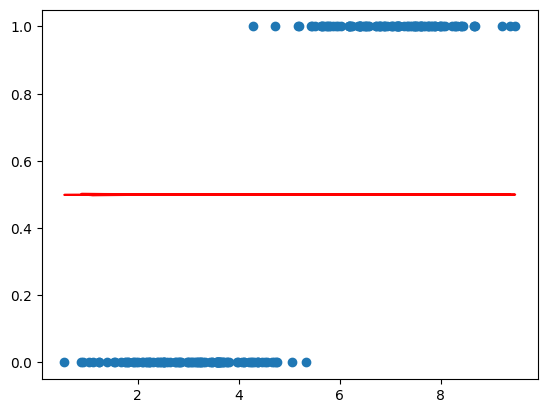

In [806]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_regression,'r')
plt.show()

### Логістична регресія

In [807]:
logistic = models.Sequential()
logistic.add(layers.Dense(4, activation='relu', input_shape=(1,)))
logistic.add(layers.Dense(1, activation='softmax'))
logistic.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['mae' ,'accuracy'])


In [808]:
logistic.fit(x, y, epochs=100)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 2), output.shape=(None, 1)

In [ ]:
y_logictic = logistic.predict_on_batch(x)
print(y_logictic)

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x, y_logictic, 'r')
plt.plot(x, tf.math.sigmoid(x), 'g')
plt.show()